In [1]:
%matplotlib inline
import pandas as pd
import re
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy
import pickle
import multiprocessing as mp

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

from scipy import stats

import numpy as np

import movies_2018
import movies_2020
import movie_data_2020
import movie_data_2019
import movie_data_2018

In [2]:
boxoffice_2018 = movie_data_2018.return_dicts()
bdf = pd.DataFrame.from_dict(boxoffice_2018)
bdf

movie_title  domestic_total_gross  runtime_minutes  \
0                     Black Panther             700059566            134.0   
1            Avengers: Infinity War             678815482            149.0   
2                     Incredibles 2             608581744            118.0   
3    Jurassic World: Fallen Kingdom             417719760            128.0   
4                        Deadpool 2             318491426            119.0   
..                              ...                   ...              ...   
903              The Long Dumb Road                  4667             90.0   
904                        Kangaroo                  4547            103.0   
905          Kickboxer: Retaliation                  4537            110.0   
906                 Never Look Away               1304042            189.0   
907                      Weightless                  4461             93.0   

    rating     budget  
0    PG-13          0  
1    PG-13          0  
2       PG          0  
3    PG-13  170000000  
4        R  110000000  
..     ...        ...  
903      R          0  
904   None          0  
905      R          0  
906      R          0  
907      R          0  

[908 rows x 5 columns]

In [3]:
metascores_2018 = movie_data_2018.return_2018()

mdf = pd.DataFrame.from_dict(metascores_2018)
mdf

metascores audience_scores critic_count num_audience_ratings
0     No score        No score   No critics           No ratings
1     No score        No score   No critics           No ratings
2     No score        No score   No critics           No ratings
3     No score        No score   No critics           No ratings
4     No score        No score   No critics           No ratings
..         ...             ...          ...                  ...
724   No score        No score   No critics           No ratings
725   No score        No score   No critics           No ratings
726   No score        No score   No critics           No ratings
727   No score        No score   No critics           No ratings
728   No score        No score   No critics           No ratings

[729 rows x 4 columns]

In [4]:
bdf['metascores'] = mdf['metascores']
bdf['audience_scores'] = mdf['audience_scores']
bdf['critic_count'] = mdf['critic_count']
bdf['num_audience_ratings'] = mdf['num_audience_ratings']
bdf
# no_na = bdf.dropna(axis=0, how='all', inplace=True)
bdf['metascores'] = bdf['metascores'].str.extract('(\d+)').astype(float)
bdf['audience scores'] = bdf['audience_scores'].str.extract('(\d+)').astype(float)
bdf['critic_count'] = bdf['critic_count'].str.extract('(\d+)').astype(float)
bdf['num_audience_ratings'] = bdf['num_audience_ratings'].str.extract('(\d+)').astype(float)
bdf['budget'] = bdf['budget'].astype(float)
bdf['domestic_total_gross'] = bdf['domestic_total_gross'].astype(float)


In [5]:
bdf = pd.get_dummies(bdf, columns=['rating'])

In [6]:
bdf.columns

Index(['movie_title', 'domestic_total_gross', 'runtime_minutes', 'budget',
       'metascores', 'audience_scores', 'critic_count', 'num_audience_ratings',
       'audience scores', 'rating_G', 'rating_M/PG', 'rating_PG',
       'rating_PG-13', 'rating_R'],
      dtype='object')

In [7]:
# bdf.dropna(axis=0)

In [8]:
boxoffice_2019 = movie_data_2019.return_dicts()
bdf1 = pd.DataFrame.from_dict(boxoffice_2019)
bdf1

movie_title  domestic_total_gross  \
0                                    Avengers: Endgame             858373000   
1                                        The Lion King             543638043   
2                                          Toy Story 4             434038008   
3                                            Frozen II             477373578   
4                                       Captain Marvel             426829839   
..                                                 ...                   ...   
903                                      In Safe Hands                  1737   
904                                           Henchmen                  1469   
905                                               1945               1006193   
906  Tall Tales from the Magical Garden of Antoon K...                   220   
907                                     Over the Limit                  3243   

     runtime_minutes rating     budget  
0              181.0  PG-13  356000000  
1              118.0     PG  260000000  
2              100.0      G  200000000  
3              103.0     PG  150000000  
4              123.0  PG-13  160000000  
..               ...    ...        ...  
903            110.0   None          0  
904             89.0   None          0  
905             91.0   None          0  
906             88.0     PG          0  
907             74.0   None          0  

[908 rows x 5 columns]

In [9]:
metascores_2019 = movie_data_2019.return_2019()

mdf1 = pd.DataFrame.from_dict(metascores_2019)
mdf1

metascores audience_scores                critic_count  \
0           78             7.8  based on 57 Critic Reviews   
1           88             8.8  based on 30 Critic Reviews   
2           84             8.0  based on 57 Critic Reviews   
3           64             6.9  based on 47 Critic Reviews   
4           64             3.5  based on 56 Critic Reviews   
..         ...             ...                         ...   
903   No score        No score                  No critics   
904   No score        No score                  No critics   
905   No score        No score                  No critics   
906   No score        No score                  No critics   
907         91        No score   based on 4 Critic Reviews   

      num_audience_ratings  
0    based on 4763 Ratings  
1     based on 768 Ratings  
2     based on 691 Ratings  
3     based on 458 Ratings  
4    based on 5119 Ratings  
..                     ...  
903             No ratings  
904             No ratings  
905             No ratings  
906             No ratings  
907             No ratings  

[908 rows x 4 columns]

In [10]:
bdf1['metascores'] = mdf1['metascores']
bdf1['audience_scores'] = mdf1['audience_scores']
bdf1['critic_count'] = mdf1['critic_count']
bdf1['num_audience_ratings'] = mdf1['num_audience_ratings']
bdf1
# no_na = bdf.dropna(axis=0, how='all', inplace=True)


movie_title  domestic_total_gross  \
0                                    Avengers: Endgame             858373000   
1                                        The Lion King             543638043   
2                                          Toy Story 4             434038008   
3                                            Frozen II             477373578   
4                                       Captain Marvel             426829839   
..                                                 ...                   ...   
903                                      In Safe Hands                  1737   
904                                           Henchmen                  1469   
905                                               1945               1006193   
906  Tall Tales from the Magical Garden of Antoon K...                   220   
907                                     Over the Limit                  3243   

     runtime_minutes rating     budget metascores audience_scores  \
0              181.0  PG-13  356000000         78             7.8   
1              118.0     PG  260000000         88             8.8   
2              100.0      G  200000000         84             8.0   
3              103.0     PG  150000000         64             6.9   
4              123.0  PG-13  160000000         64             3.5   
..               ...    ...        ...        ...             ...   
903            110.0   None          0   No score        No score   
904             89.0   None          0   No score        No score   
905             91.0   None          0   No score        No score   
906             88.0     PG          0   No score        No score   
907             74.0   None          0         91        No score   

                   critic_count   num_audience_ratings  
0    based on 57 Critic Reviews  based on 4763 Ratings  
1    based on 30 Critic Reviews   based on 768 Ratings  
2    based on 57 Critic Reviews   based on 691 Ratings  
3    based on 47 Critic Reviews   based on 458 Ratings  
4    based on 56 Critic Reviews  based on 5119 Ratings  
..                          ...                    ...  
903                  No critics             No ratings  
904                  No critics             No ratings  
905                  No critics             No ratings  
906                  No critics             No ratings  
907   based on 4 Critic Reviews             No ratings  

[908 rows x 9 columns]

In [11]:
bdf1['metascores'] = bdf1['metascores'].str.extract('(\d+)').astype(float)
bdf1['audience scores'] = bdf1['audience_scores'].str.extract('(\d+)').astype(float)
bdf1['critic_count'] = bdf1['critic_count'].str.extract('(\d+)').astype(float)
bdf1['num_audience_ratings'] = bdf1['num_audience_ratings'].str.extract('(\d+)').astype(float)
bdf1['budget'] = bdf1['budget'].astype(float)
bdf1['domestic_total_gross'] = bdf1['domestic_total_gross'].astype(float)

In [12]:
# bdf1.dropna(axis=0)

In [13]:
boxoffice_2020 = movie_data_2020.return_dicts()
bdf2 = pd.DataFrame.from_dict(boxoffice_2020)
bdf2

movie_title  domestic_total_gross  \
0                                    Bad Boys for Life             204417855   
1                                                 1917             159227644   
2                                   Sonic the Hedgehog             146066470   
3                              Jumanji: The Next Level             316831246   
4                                Star Wars: Episode IX             515202542   
..                                                 ...                   ...   
255  I Do Not Care If We Go Down in History as Barb...                 11307   
256                                           The Load                 28410   
257                                       Asako I & II                 25559   
258                                   Chained for Life                 17431   
259                                 Shooting the Mafia                 10881   

     runtime_minutes rating     budget  
0              124.0      R   90000000  
1              119.0      R   95000000  
2               99.0     PG   85000000  
3              123.0  PG-13  125000000  
4              142.0  PG-13  275000000  
..               ...    ...        ...  
255            140.0   None          0  
256             98.0   None          0  
257            119.0   None          0  
258             91.0   None          0  
259             94.0   None          0  

[260 rows x 5 columns]

In [14]:
metascores_2020 = movie_data_2020.return_2020()

mdf2 = pd.DataFrame.from_dict(metascores_2020)
mdf2

metascores audience_scores                critic_count  \
0           59             6.7  based on 46 Critic Reviews   
1           78             8.4  based on 57 Critic Reviews   
2           47             8.3  based on 42 Critic Reviews   
3           58             6.4  based on 37 Critic Reviews   
4           53             4.7  based on 61 Critic Reviews   
..         ...             ...                         ...   
246         81        No score  based on 10 Critic Reviews   
247         47             4.7  based on 31 Critic Reviews   
248         68             7.4  based on 20 Critic Reviews   
249         79        No score  based on 14 Critic Reviews   
250         61        No score  based on 15 Critic Reviews   

      num_audience_ratings  
0     based on 228 Ratings  
1     based on 722 Ratings  
2    based on 1097 Ratings  
3     based on 263 Ratings  
4    based on 4896 Ratings  
..                     ...  
246             No ratings  
247   based on 100 Ratings  
248     based on 5 Ratings  
249             No ratings  
250             No ratings  

[251 rows x 4 columns]

In [15]:
bdf2['metascores'] = mdf2['metascores']
bdf2['audience_scores'] = mdf2['audience_scores']
bdf2['critic_count'] = mdf2['critic_count']
bdf2['num_audience_ratings'] = mdf2['num_audience_ratings']
bdf2

movie_title  domestic_total_gross  \
0                                    Bad Boys for Life             204417855   
1                                                 1917             159227644   
2                                   Sonic the Hedgehog             146066470   
3                              Jumanji: The Next Level             316831246   
4                                Star Wars: Episode IX             515202542   
..                                                 ...                   ...   
255  I Do Not Care If We Go Down in History as Barb...                 11307   
256                                           The Load                 28410   
257                                       Asako I & II                 25559   
258                                   Chained for Life                 17431   
259                                 Shooting the Mafia                 10881   

     runtime_minutes rating     budget metascores audience_scores  \
0              124.0      R   90000000         59             6.7   
1              119.0      R   95000000         78             8.4   
2               99.0     PG   85000000         47             8.3   
3              123.0  PG-13  125000000         58             6.4   
4              142.0  PG-13  275000000         53             4.7   
..               ...    ...        ...        ...             ...   
255            140.0   None          0        NaN             NaN   
256             98.0   None          0        NaN             NaN   
257            119.0   None          0        NaN             NaN   
258             91.0   None          0        NaN             NaN   
259             94.0   None          0        NaN             NaN   

                   critic_count   num_audience_ratings  
0    based on 46 Critic Reviews   based on 228 Ratings  
1    based on 57 Critic Reviews   based on 722 Ratings  
2    based on 42 Critic Reviews  based on 1097 Ratings  
3    based on 37 Critic Reviews   based on 263 Ratings  
4    based on 61 Critic Reviews  based on 4896 Ratings  
..                          ...                    ...  
255                         NaN                    NaN  
256                         NaN                    NaN  
257                         NaN                    NaN  
258                         NaN                    NaN  
259                         NaN                    NaN  

[260 rows x 9 columns]

In [16]:
bdf2['metascores'] = bdf2['metascores'].str.extract('(\d+)').astype(float)
bdf2['audience scores'] = bdf2['audience_scores'].str.extract('(\d+)').astype(float)
bdf2['critic_count'] = bdf2['critic_count'].str.extract('(\d+)').astype(float)
bdf2['num_audience_ratings'] = bdf2['num_audience_ratings'].str.extract('(\d+)').astype(float)
bdf2['budget'] = bdf2['budget'].astype(float)
bdf2['domestic_total_gross'] = bdf2['domestic_total_gross'].astype(float)

In [17]:
# bdf2.dropna(axis=0)

In [18]:
frames = [bdf, bdf1, bdf2]
bdf3 = pd.concat(frames)
bdf3.drop(columns=['rating'])

movie_title  domestic_total_gross  \
0                                        Black Panther           700059566.0   
1                               Avengers: Infinity War           678815482.0   
2                                        Incredibles 2           608581744.0   
3                       Jurassic World: Fallen Kingdom           417719760.0   
4                                           Deadpool 2           318491426.0   
..                                                 ...                   ...   
255  I Do Not Care If We Go Down in History as Barb...               11307.0   
256                                           The Load               28410.0   
257                                       Asako I & II               25559.0   
258                                   Chained for Life               17431.0   
259                                 Shooting the Mafia               10881.0   

     runtime_minutes       budget  metascores audience_scores  critic_count  \
0              134.0          0.0         NaN        No score           NaN   
1              149.0          0.0         NaN        No score           NaN   
2              118.0          0.0         NaN        No score           NaN   
3              128.0  170000000.0         NaN        No score           NaN   
4              119.0  110000000.0         NaN        No score           NaN   
..               ...          ...         ...             ...           ...   
255            140.0          0.0         NaN             NaN           NaN   
256             98.0          0.0         NaN             NaN           NaN   
257            119.0          0.0         NaN             NaN           NaN   
258             91.0          0.0         NaN             NaN           NaN   
259             94.0          0.0         NaN             NaN           NaN   

     num_audience_ratings  audience scores  rating_G  rating_M/PG  rating_PG  \
0                     NaN              NaN       0.0          0.0        0.0   
1                     NaN              NaN       0.0          0.0        0.0   
2                     NaN              NaN       0.0          0.0        1.0   
3                     NaN              NaN       0.0          0.0        0.0   
4                     NaN              NaN       0.0          0.0        0.0   
..                    ...              ...       ...          ...        ...   
255                   NaN              NaN       NaN          NaN        NaN   
256                   NaN              NaN       NaN          NaN        NaN   
257                   NaN              NaN       NaN          NaN        NaN   
258                   NaN              NaN       NaN          NaN        NaN   
259                   NaN              NaN       NaN          NaN        NaN   

     rating_PG-13  rating_R  
0             1.0       0.0  
1             1.0       0.0  
2             0.0       0.0  
3             1.0       0.0  
4             0.0       1.0  
..            ...       ...  
255           NaN       NaN  
256           NaN       NaN  
257           NaN       NaN  
258           NaN       NaN  
259           NaN       NaN  

[2076 rows x 14 columns]

In [19]:
print(bdf3.shape)
bdf4 = bdf3.fillna(0)
bdf4['audience_scores'] = bdf4['audience_scores'].str.extract('(\d+)').astype(float)
bdf4 = bdf4.fillna(0)

(2076, 15)


In [20]:
bdf4.set_index('movie_title')

domestic_total_gross  \
movie_title                                                                
Black Panther                                                700059566.0   
Avengers: Infinity War                                       678815482.0   
Incredibles 2                                                608581744.0   
Jurassic World: Fallen Kingdom                               417719760.0   
Deadpool 2                                                   318491426.0   
...                                                                  ...   
I Do Not Care If We Go Down in History as Barba...               11307.0   
The Load                                                         28410.0   
Asako I & II                                                     25559.0   
Chained for Life                                                 17431.0   
Shooting the Mafia                                               10881.0   

                                                    runtime_minutes  \
movie_title                                                           
Black Panther                                                 134.0   
Avengers: Infinity War                                        149.0   
Incredibles 2                                                 118.0   
Jurassic World: Fallen Kingdom                                128.0   
Deadpool 2                                                    119.0   
...                                                             ...   
I Do Not Care If We Go Down in History as Barba...            140.0   
The Load                                                       98.0   
Asako I & II                                                  119.0   
Chained for Life                                               91.0   
Shooting the Mafia                                             94.0   

                                                         budget  metascores  \
movie_title                                                                   
Black Panther                                               0.0         0.0   
Avengers: Infinity War                                      0.0         0.0   
Incredibles 2                                               0.0         0.0   
Jurassic World: Fallen Kingdom                      170000000.0         0.0   
Deadpool 2                                          110000000.0         0.0   
...                                                         ...         ...   
I Do Not Care If We Go Down in History as Barba...          0.0         0.0   
The Load                                                    0.0         0.0   
Asako I & II                                                0.0         0.0   
Chained for Life                                            0.0         0.0   
Shooting the Mafia                                          0.0         0.0   

                                                    audience_scores  \
movie_title                                                           
Black Panther                                                   0.0   
Avengers: Infinity War                                          0.0   
Incredibles 2                                                   0.0   
Jurassic World: Fallen Kingdom                                  0.0   
Deadpool 2                                                      0.0   
...                                                             ...   
I Do Not Care If We Go Down in History as Barba...              0.0   
The Load                                                        0.0   
Asako I & II                                                    0.0   
Chained for Life                                                0.0   
Shooting the Mafia                                              0.0   

                                                    critic_count  \
movie_title                                                        
Black Panther                                      

In [21]:
bdf4.columns

Index(['movie_title', 'domestic_total_gross', 'runtime_minutes', 'budget',
       'metascores', 'audience_scores', 'critic_count', 'num_audience_ratings',
       'audience scores', 'rating_G', 'rating_M/PG', 'rating_PG',
       'rating_PG-13', 'rating_R', 'rating'],
      dtype='object')

In [22]:
bdf4.corr()

domestic_total_gross  runtime_minutes    budget  \
domestic_total_gross              1.000000         0.087596  0.686223   
runtime_minutes                   0.087596         1.000000  0.125848   
budget                            0.686223         0.125848  1.000000   
metascores                        0.114461         0.044503  0.109980   
audience_scores                   0.179287         0.062460  0.180433   
critic_count                      0.313986         0.092688  0.331479   
num_audience_ratings              0.466726         0.071730  0.395871   
audience scores                   0.179287         0.062460  0.180433   
rating_G                         -0.005463        -0.096122 -0.016971   
rating_M/PG                      -0.006098         0.006399 -0.006405   
rating_PG                         0.082102         0.000750  0.042449   
rating_PG-13                      0.209254         0.023024  0.189326   
rating_R                         -0.005333         0.038177 -0.016855   

                      metascores  audience_scores  critic_count  \
domestic_total_gross    0.114461         0.179287      0.313986   
runtime_minutes         0.044503         0.062460      0.092688   
budget                  0.109980         0.180433      0.331479   
metascores              1.000000         0.748877      0.720928   
audience_scores         0.748877         1.000000      0.771436   
critic_count            0.720928         0.771436      1.000000   
num_audience_ratings    0.204559         0.274138      0.462775   
audience scores         0.748877         1.000000      0.771436   
rating_G               -0.038328        -0.040214     -0.036211   
rating_M/PG            -0.018990        -0.015178     -0.014761   
rating_PG               0.009100         0.038665      0.011646   
rating_PG-13           -0.065438        -0.026260     -0.032244   
rating_R                0.003386        -0.001970     -0.043257   

                      num_audience_ratings  audience scores  rating_G  \
domestic_total_gross              0.466726         0.179287 -0.005463   
runtime_minutes                   0.071730         0.062460 -0.096122   
budget                            0.395871         0.180433 -0.016971   
metascores                        0.204559         0.748877 -0.038328   
audience_scores                   0.274138         1.000000 -0.040214   
critic_count                      0.462775         0.771436 -0.036211   
num_audience_ratings              1.000000         0.274138 -0.010781   
audience scores                   0.274138         1.000000 -0.040214   
rating_G                         -0.010781        -0.040214  1.000000   
rating_M/PG                      -0.004069        -0.015178 -0.001277   
rating_PG                        -0.017350         0.038665 -0.011104   
rating_PG-13                     -0.001416        -0.026260 -0.014723   
rating_R                         -0.024392        -0.001970 -0.019513   

                      rating_M/PG  rating_PG  rating_PG-13  rating_R  
domestic_total_gross    -0.006098   0.082102      0.209254 -0.005333  
runtime_minutes          0.006399   0.000750      0.023024  0.038177  
budget                  -0.006405   0.042449      0.189326 -0.016855  
metascores              -0.018990   0.009100     -0.065438  0.003386  
audience_scores         -0.015178   0.038665     -0.026260 -0.001970  
critic_count            -0.014761   0.011646     -0.032244 -0.043257  
num_audience_ratings    -0.004069  -0.017350     -0.001416 -0.024392  
audience scores         -0.015178   0.038665     -0.026260 -0.001970  
rating_G                -0.001277  -0.011104     -0.014723 -0.019513  
rating_M/PG              1.000000  -0.004191     -0.005557 -0.007365  
rating_PG               -0.004191   1.000000     -0.048322 -0.064043  
rating_PG-13            -0.005557  -0.048322      1.000000 -0.084914  
rating_R                -0.007365  -0.064043     -0.084914  1.000000

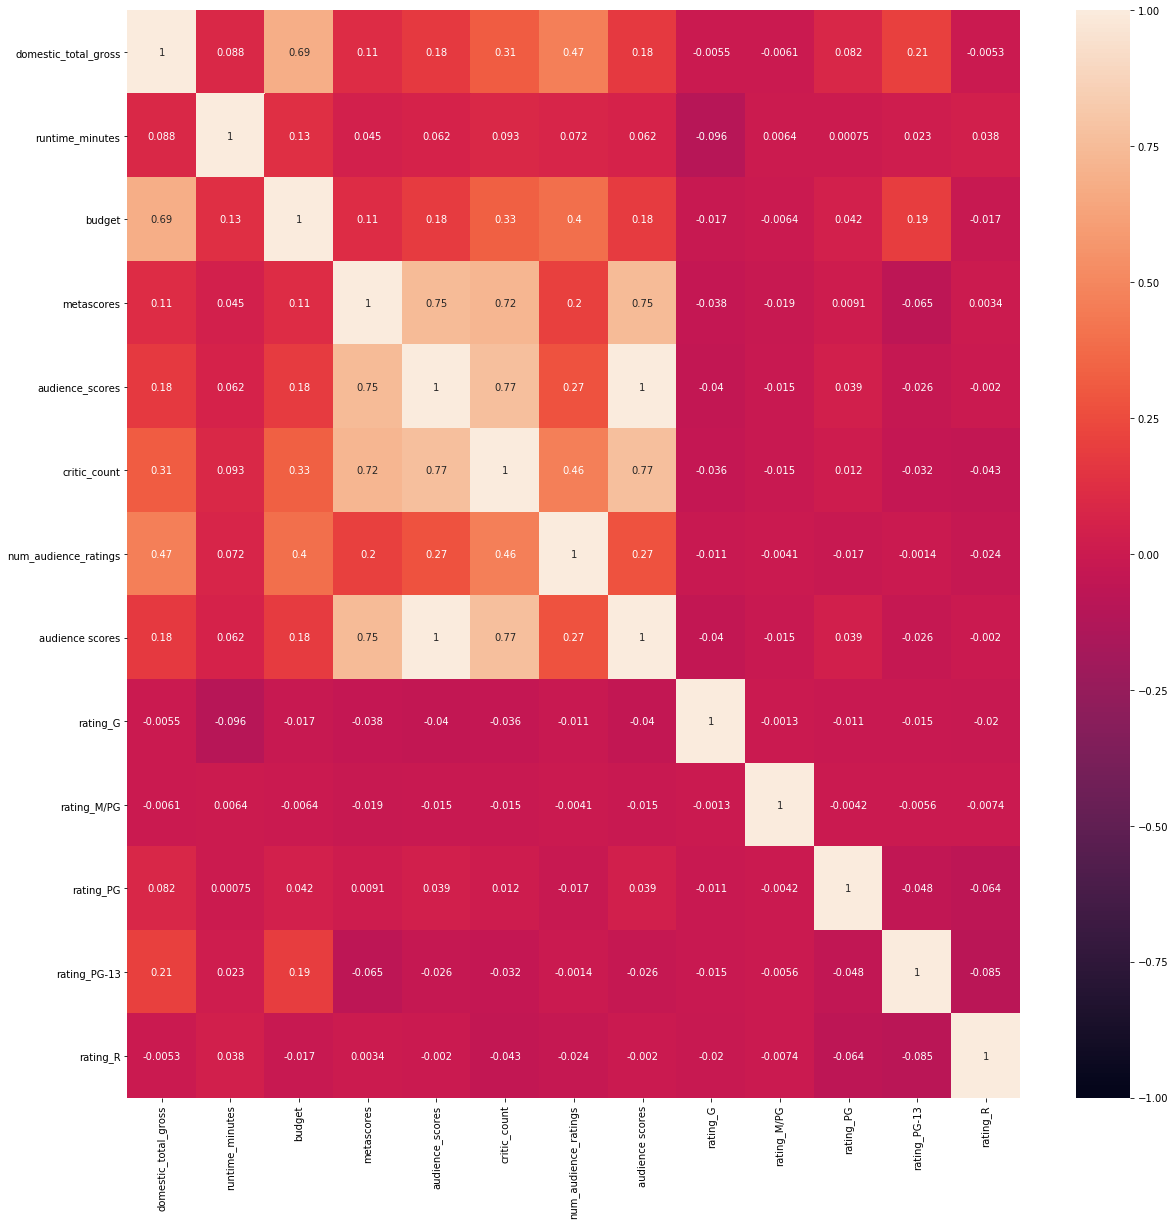

In [23]:
plt.figure(figsize=[20, 20])
sns.heatmap(bdf4.corr(), annot=True, vmin = -1, vmax = 1)

In [24]:
# sns.pairplot(bdf4)

In [25]:
# y, X = patsy.dmatrices('domestic_total_gross ~ runtime_minutes + budget + metascores + critic_count + num_audience_ratings + audience_scores + rating_G + rating_M/PG + rating_PG + rating_PG-13 + rating_R', data=bdf4, return_type="dataframe")

y, X = patsy.dmatrices('domestic_total_gross ~  budget + metascores + critic_count + num_audience_ratings + audience_scores', data=bdf4, return_type="dataframe")

model = sm.OLS(y, X)

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     domestic_total_gross   R-squared:                       0.516
Model:                              OLS   Adj. R-squared:                  0.515
Method:                   Least Squares   F-statistic:                     441.8
Date:                  Wed, 15 Jul 2020   Prob (F-statistic):          3.46e-323
Time:                          16:48:28   Log-Likelihood:                -39385.
No. Observations:                  2076   AIC:                         7.878e+04
Df Residuals:                      2070   BIC:                         7.882e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.092e+06   1.24e+06      3.310      0.001    1.67e+06    6.52e+06
budget                   1.1311      0.033     34.521      0.000       1.067       1.195
metascores           -3.085e+04   4.45e+04     -0.693      0.488   -1.18e+05    5.64e+04
critic_count          8.374e+04   1.23e+05      0.684      0.494   -1.57e+05    3.24e+05
num_audience_ratings  3.968e+04   3229.043     12.288      0.000    3.33e+04     4.6e+04
audience_scores       1.724e+05    5.3e+05      0.325      0.745   -8.67e+05    1.21e+06
==============================================================================
Omnibus:                     2771.677   Durbin-Watson:                   1.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           877385.988
Skew:                           7.216   Prob(JB):                         0.00
Kurtosis:                     102.674   Cond. No.                     4.40e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [280]:
y, X = patsy.dmatrices('domestic_total_gross ~ metascores + critic_count', data=bdf4, return_type="dataframe")

model = sm.OLS(y, X)

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     domestic_total_gross   R-squared:                       0.125
Model:                              OLS   Adj. R-squared:                  0.124
Method:                   Least Squares   F-statistic:                     147.6
Date:                  Wed, 15 Jul 2020   Prob (F-statistic):           1.16e-60
Time:                          22:12:25   Log-Likelihood:                -40000.
No. Observations:                  2076   AIC:                         8.001e+04
Df Residuals:                      2073   BIC:                         8.002e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9.881e+06   1.64e+06      6.018      0.000    6.66e+06    1.31e+07
metascores    -4.14e+05   5.27e+04     -7.858      0.000   -5.17e+05   -3.11e+05
critic_count   2.03e+06   1.25e+05     16.254      0.000    1.79e+06    2.28e+06
==============================================================================
Omnibus:                     2586.560   Durbin-Watson:                   0.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           354458.871
Skew:                           6.681   Prob(JB):                         0.00
Kurtosis:                      65.604   Cond. No.                         62.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
y, X = patsy.dmatrices('domestic_total_gross ~ metascores + num_audience_ratings', data=bdf4, return_type="dataframe")

model = sm.OLS(y, X)

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     domestic_total_gross   R-squared:                       0.218
Model:                              OLS   Adj. R-squared:                  0.217
Method:                   Least Squares   F-statistic:                     289.3
Date:                  Wed, 15 Jul 2020   Prob (F-statistic):          1.54e-111
Time:                          22:13:13   Log-Likelihood:                -39883.
No. Observations:                  2076   AIC:                         7.977e+04
Df Residuals:                      2073   BIC:                         7.979e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.107e+07   1.55e+06      7.141      0.000    8.03e+06    1.41e+07
metascores            3.521e+04   3.53e+04      0.999      0.318   -3.39e+04    1.04e+05
num_audience_ratings  8.169e+04   3502.927     23.321      0.000    7.48e+04    8.86e+04
==============================================================================
Omnibus:                     2447.567   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           313457.335
Skew:                           6.045   Prob(JB):                         0.00
Kurtosis:                      61.971   Cond. No.                         460.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
y, X = patsy.dmatrices('domestic_total_gross ~ metascores + num_audience_ratings', data=bdf4, return_type="dataframe")

model = sm.OLS(y, X)

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     domestic_total_gross   R-squared:                       0.218
Model:                              OLS   Adj. R-squared:                  0.217
Method:                   Least Squares   F-statistic:                     289.3
Date:                  Wed, 15 Jul 2020   Prob (F-statistic):          1.54e-111
Time:                          22:14:17   Log-Likelihood:                -39883.
No. Observations:                  2076   AIC:                         7.977e+04
Df Residuals:                      2073   BIC:                         7.979e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.107e+07   1.55e+06      7.141      0.000    8.03e+06    1.41e+07
metascores            3.521e+04   3.53e+04      0.999      0.318   -3.39e+04    1.04e+05
num_audience_ratings  8.169e+04   3502.927     23.321      0.000    7.48e+04    8.86e+04
==============================================================================
Omnibus:                     2447.567   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           313457.335
Skew:                           6.045   Prob(JB):                         0.00
Kurtosis:                      61.971   Cond. No.                         460.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
y, X = patsy.dmatrices('metascores ~ domestic_total_gross + budget + critic_count + num_audience_ratings + audience_scores + rating_R', data=bdf4, return_type="dataframe")

model = sm.OLS(y, X)

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metascores   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     581.9
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:48:28   Log-Likelihood:                -9238.1
No. Observations:                2076   AIC:                         1.849e+04
Df Residuals:                    2069   BIC:                         1.853e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.9110      0.592     16.750      0.000       8.751      11.071
domestic_total_gross -7.778e-09   1.09e-08     -0.717      0.474   -2.91e-08    1.35e-08
budget               -8.004e-08   2.02e-08     -3.956      0.000    -1.2e-07   -4.04e-08
critic_count             1.0726      0.056     19.200      0.000       0.963       1.182
num_audience_ratings    -0.0089      0.002     -5.401      0.000      -0.012      -0.006
audience_scores          4.9031      0.239     20.557      0.000       4.435       5.371
rating_R                 2.2892      1.514      1.512      0.131      -0.680       5.258
==============================================================================
Omnibus:                      510.220   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              996.103
Skew:                           1.485   Prob(JB):                    5.00e-217
Kurtosis:                       4.641   Cond. No.                     2.26e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
y, X = patsy.dmatrices('critic_count ~ num_audience_ratings + audience_scores + metascores', data=bdf4, return_type="dataframe")

model = sm.OLS(y, X)

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           critic_count   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1693.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:48:28   Log-Likelihood:                -7186.5
No. Observations:                2076   AIC:                         1.438e+04
Df Residuals:                    2072   BIC:                         1.440e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3839      0.224      1.712      0.087      -0.056       0.824
num_audience_ratings     0.0114      0.001     22.117      0.000       0.010       0.012
audience_scores          2.1249      0.085     24.903      0.000       1.958       2.292
metascores               0.1377      0.008     18.300      0.000       0.123       0.152
==============================================================================
Omnibus:                      295.718   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1429.253
Skew:                           0.588   Prob(JB):                    4.38e-311
Kurtosis:                       6.891   Cond. No.                         461.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y, X = patsy.dmatrices('critic_count ~ domestic_total_gross + budget + metascores + num_audience_ratings + audience_scores + metascores', data=bdf4, return_type="dataframe")

model = sm.OLS(y, X)

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           critic_count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1085.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:48:28   Log-Likelihood:                -7136.7
No. Observations:                2076   AIC:                         1.429e+04
Df Residuals:                    2070   BIC:                         1.432e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0301      0.222      0.136      0.892      -0.406       0.466
domestic_total_gross  2.695e-09   3.94e-09      0.684      0.494   -5.04e-09    1.04e-08
budget                5.468e-08   7.28e-09      7.512      0.000    4.04e-08    6.89e-08
metascores               0.1408      0.007     19.138      0.000       0.126       0.155
num_audience_ratings     0.0093      0.001     16.478      0.000       0.008       0.010
audience_scores          2.0522      0.084     24.531      0.000       1.888       2.216
==============================================================================
Omnibus:                      248.977   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1058.828
Skew:                           0.512   Prob(JB):                    1.20e-230
Kurtosis:                       6.346   Cond. No.                     9.07e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
bdf4

movie_title  domestic_total_gross  \
0                                        Black Panther           700059566.0   
1                               Avengers: Infinity War           678815482.0   
2                                        Incredibles 2           608581744.0   
3                       Jurassic World: Fallen Kingdom           417719760.0   
4                                           Deadpool 2           318491426.0   
..                                                 ...                   ...   
255  I Do Not Care If We Go Down in History as Barb...               11307.0   
256                                           The Load               28410.0   
257                                       Asako I & II               25559.0   
258                                   Chained for Life               17431.0   
259                                 Shooting the Mafia               10881.0   

     runtime_minutes       budget  metascores  audience_scores  critic_count  \
0              134.0          0.0         0.0              0.0           0.0   
1              149.0          0.0         0.0              0.0           0.0   
2              118.0          0.0         0.0              0.0           0.0   
3              128.0  170000000.0         0.0              0.0           0.0   
4              119.0  110000000.0         0.0              0.0           0.0   
..               ...          ...         ...              ...           ...   
255            140.0          0.0         0.0              0.0           0.0   
256             98.0          0.0         0.0              0.0           0.0   
257            119.0          0.0         0.0              0.0           0.0   
258             91.0          0.0         0.0              0.0           0.0   
259             94.0          0.0         0.0              0.0           0.0   

     num_audience_ratings  audience scores  rating_G  rating_M/PG  rating_PG  \
0                     0.0              0.0       0.0          0.0        0.0   
1                     0.0              0.0       0.0          0.0        0.0   
2                     0.0              0.0       0.0          0.0        1.0   
3                     0.0              0.0       0.0          0.0        0.0   
4                     0.0              0.0       0.0          0.0        0.0   
..                    ...              ...       ...          ...        ...   
255                   0.0              0.0       0.0          0.0        0.0   
256                   0.0              0.0       0.0          0.0        0.0   
257                   0.0              0.0       0.0          0.0        0.0   
258                   0.0              0.0       0.0          0.0        0.0   
259                   0.0              0.0       0.0          0.0        0.0   

     rating_PG-13  rating_R rating  
0             1.0       0.0      0  
1             1.0       0.0      0  
2             0.0       0.0      0  
3             1.0       0.0      0  
4             0.0       1.0      0  
..            ...       ...    ...  
255           0.0       0.0      0  
256           0.0       0.0      0  
257           0.0       0.0      0  
258           0.0       0.0      0  
259           0.0       0.0      0  

[2076 rows x 15 columns]

In [30]:
with open('movies_df.pickle', 'wb') as output:
    pickle.dump(bdf4, output)

In [31]:
with open('movies_df.pickle', 'rb') as data:
    df = pickle.load(data)

bdf5 = bdf4.drop(columns=['runtime_minutes'])

df

movie_title  domestic_total_gross  \
0                                        Black Panther           700059566.0   
1                               Avengers: Infinity War           678815482.0   
2                                        Incredibles 2           608581744.0   
3                       Jurassic World: Fallen Kingdom           417719760.0   
4                                           Deadpool 2           318491426.0   
..                                                 ...                   ...   
255  I Do Not Care If We Go Down in History as Barb...               11307.0   
256                                           The Load               28410.0   
257                                       Asako I & II               25559.0   
258                                   Chained for Life               17431.0   
259                                 Shooting the Mafia               10881.0   

     runtime_minutes       budget  metascores  audience_scores  critic_count  \
0              134.0          0.0         0.0              0.0           0.0   
1              149.0          0.0         0.0              0.0           0.0   
2              118.0          0.0         0.0              0.0           0.0   
3              128.0  170000000.0         0.0              0.0           0.0   
4              119.0  110000000.0         0.0              0.0           0.0   
..               ...          ...         ...              ...           ...   
255            140.0          0.0         0.0              0.0           0.0   
256             98.0          0.0         0.0              0.0           0.0   
257            119.0          0.0         0.0              0.0           0.0   
258             91.0          0.0         0.0              0.0           0.0   
259             94.0          0.0         0.0              0.0           0.0   

     num_audience_ratings  audience scores  rating_G  rating_M/PG  rating_PG  \
0                     0.0              0.0       0.0          0.0        0.0   
1                     0.0              0.0       0.0          0.0        0.0   
2                     0.0              0.0       0.0          0.0        1.0   
3                     0.0              0.0       0.0          0.0        0.0   
4                     0.0              0.0       0.0          0.0        0.0   
..                    ...              ...       ...          ...        ...   
255                   0.0              0.0       0.0          0.0        0.0   
256                   0.0              0.0       0.0          0.0        0.0   
257                   0.0              0.0       0.0          0.0        0.0   
258                   0.0              0.0       0.0          0.0        0.0   
259                   0.0              0.0       0.0          0.0        0.0   

     rating_PG-13  rating_R rating  
0             1.0       0.0      0  
1             1.0       0.0      0  
2             0.0       0.0      0  
3             1.0       0.0      0  
4             0.0       1.0      0  
..            ...       ...    ...  
255           0.0       0.0      0  
256           0.0       0.0      0  
257           0.0       0.0      0  
258           0.0       0.0      0  
259           0.0       0.0      0  

[2076 rows x 15 columns]

In [252]:
mdf = bdf4.set_index('movie_title').drop(['runtime_minutes', 'audience scores', 'rating_G', 'rating_M/PG', 'rating_PG-13', 'rating_PG', 'rating_R', 'rating'], axis=1)
mdf.reset_index(inplace=True)

m_df = mdf.drop(columns=['movie_title'])
m_df

dropped_noscores = m_df.loc[m_df['metascores'] != 0.0]
dropped_noscores

domestic_total_gross       budget  metascores  audience_scores  \
5              270620950.0   75000000.0        95.0              6.0   
10             213515506.0  100000000.0        48.0              6.0   
11             215288866.0   36000000.0        80.0              7.0   
12             335061807.0          0.0        72.0              8.0   
15             201091711.0  175000000.0        28.0              5.0   
...                    ...          ...         ...              ...   
2062                5166.0          0.0        81.0              0.0   
2063                3816.0          0.0        47.0              4.0   
2064                1051.0          0.0        68.0              7.0   
2065              225250.0          0.0        79.0              0.0   
2066                 564.0          0.0        61.0              0.0   

      critic_count  num_audience_ratings  
5             46.0                1199.0  
10            52.0                 628.0  
11            41.0                  79.0  
12            25.0                  26.0  
15             4.0                   9.0  
...            ...                   ...  
2062          10.0                   0.0  
2063          31.0                 100.0  
2064          20.0                   5.0  
2065          14.0                   0.0  
2066          15.0                   0.0  

[943 rows x 6 columns]

In [292]:
y, X = patsy.dmatrices('domestic_total_gross ~ metascores + critic_count + audience_scores + num_audience_ratings', data=dropped_noscores, return_type="dataframe")

model = sm.OLS(y, X)

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     domestic_total_gross   R-squared:                       0.373
Model:                              OLS   Adj. R-squared:                  0.371
Method:                   Least Squares   F-statistic:                     139.7
Date:                  Wed, 15 Jul 2020   Prob (F-statistic):           1.16e-93
Time:                          22:15:37   Log-Likelihood:                -18146.
No. Observations:                   943   AIC:                         3.630e+04
Df Residuals:                       938   BIC:                         3.633e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.041e+05   7.82e+06      0.052      0.959   -1.49e+07    1.57e+07
metascores           -8.785e+04   1.14e+05     -0.774      0.439   -3.11e+05    1.35e+05
critic_count          1.034e+06    1.6e+05      6.480      0.000    7.21e+05    1.35e+06
audience_scores      -2.528e+05      7e+05     -0.361      0.718   -1.63e+06    1.12e+06
num_audience_ratings  6.786e+04   4113.363     16.498      0.000    5.98e+04    7.59e+04
==============================================================================
Omnibus:                      764.351   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27884.871
Skew:                           3.407   Prob(JB):                         0.00
Kurtosis:                      28.754   Cond. No.                     2.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [255]:
log_transform = dropped_noscores.transform(lambda x: np.log(x))
log_transform

/home/nick/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


domestic_total_gross     budget  metascores  audience_scores  \
5                19.416230  18.132999    4.553877         1.791759   
10               19.179220  18.420681    3.871201         1.791759   
11               19.187491  17.399029    4.382027         1.945910   
12               19.629826       -inf    4.276666         2.079442   
15               19.119272  18.980297    3.332205         1.609438   
...                    ...        ...         ...              ...   
2062              8.549854       -inf    4.394449             -inf   
2063              8.246958       -inf    3.850148         1.386294   
2064              6.957497       -inf    4.219508         1.945910   
2065             12.324966       -inf    4.369448             -inf   
2066              6.335054       -inf    4.110874             -inf   

      critic_count  num_audience_ratings  
5         3.828641              7.089243  
10        3.951244              6.442540  
11        3.713572              4.369448  
12        3.218876              3.258097  
15        1.386294              2.197225  
...            ...                   ...  
2062      2.302585                  -inf  
2063      3.433987              4.605170  
2064      2.995732              1.609438  
2065      2.639057                  -inf  
2066      2.708050                  -inf  

[943 rows x 6 columns]

In [267]:
log_transform_dropped = log_transform.loc[log_transform['budget'] != float("-inf")]
log_transform_dropped = log_transform_dropped.loc[log_transform_dropped['audience_scores'] != float("-inf")]
log_transform_dropped

domestic_total_gross     budget  metascores  audience_scores  \
5                19.416230  18.132999    4.553877         1.791759   
10               19.179220  18.420681    3.871201         1.791759   
11               19.187491  17.399029    4.382027         1.945910   
15               19.119272  18.980297    3.332205         1.609438   
17               18.936554  18.197537    4.174387         1.945910   
...                    ...        ...         ...              ...   
1953             17.921724  18.132999    4.110874         1.791759   
1955             17.375157  17.034386    4.248495         1.791759   
1964             17.058953  15.687313    4.317488         1.791759   
2014             16.909064  16.300417    4.025352         1.945910   
2045             18.469124  16.811243    4.189655         1.945910   

      critic_count  num_audience_ratings  
5         3.828641              7.089243  
10        3.951244              6.442540  
11        3.713572              4.369448  
15        1.386294              2.197225  
17        3.526361              3.218876  
...            ...                   ...  
1953      2.564949              2.197225  
1955      3.258097              2.890372  
1964      2.772589              2.197225  
2014      3.401197              2.995732  
2045      2.995732              2.079442  

[207 rows x 6 columns]

In [256]:
exp_transform = dropped_noscores.transform(lambda x: np.sqrt(x))
exp_transform

domestic_total_gross        budget  metascores  audience_scores  \
5             16450.560781   8660.254038    9.746794         2.449490   
10            14612.169791  10000.000000    6.928203         2.449490   
11            14672.725241   6000.000000    8.944272         2.645751   
12            18304.693578      0.000000    8.485281         2.828427   
15            14180.680907  13228.756555    5.291503         2.236068   
...                    ...           ...         ...              ...   
2062             71.874891      0.000000    9.000000         0.000000   
2063             61.773781      0.000000    6.855655         2.000000   
2064             32.419130      0.000000    8.246211         2.645751   
2065            474.605099      0.000000    8.888194         0.000000   
2066             23.748684      0.000000    7.810250         0.000000   

      critic_count  num_audience_ratings  
5         6.782330             34.626579  
10        7.211103             25.059928  
11        6.403124              8.888194  
12        5.000000              5.099020  
15        2.000000              3.000000  
...            ...                   ...  
2062      3.162278              0.000000  
2063      5.567764             10.000000  
2064      4.472136              2.236068  
2065      3.741657              0.000000  
2066      3.872983              0.000000  

[943 rows x 6 columns]

In [257]:
with open('log.pickle', 'wb') as output:
    pickle.dump(log_transform, output)
with open('exp.pickle', 'wb') as output:
    pickle.dump(exp_transform, output)
with open('dropped_noscores.pickle', 'wb') as output:
    pickle.dump(dropped_noscores, output)

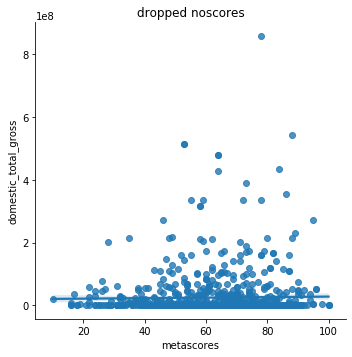

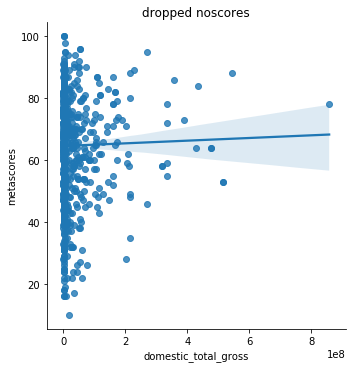

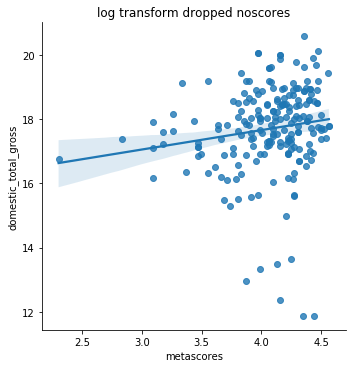

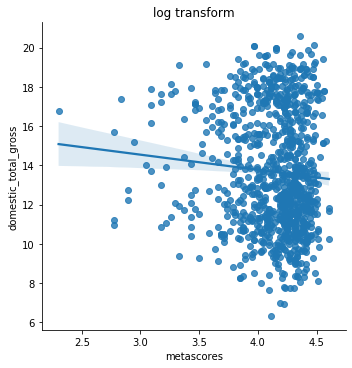

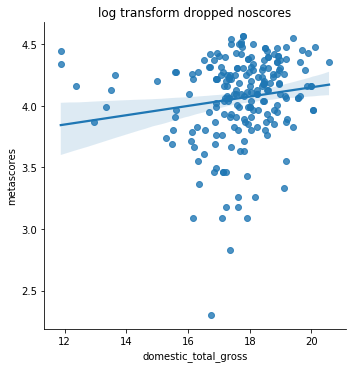

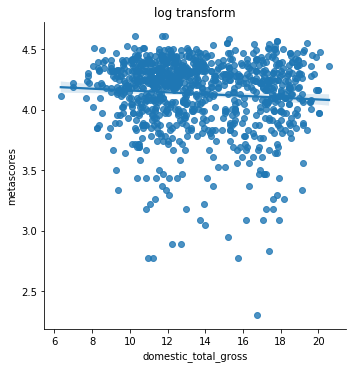

In [279]:
sns.lmplot(x="metascores", y="domestic_total_gross", data=dropped_noscores)
plt.title("dropped noscores");
sns.lmplot(x="domestic_total_gross", y="metascores", data=dropped_noscores)
plt.title("dropped noscores");
sns.lmplot(x="metascores", y="domestic_total_gross", data=log_transform_dropped)
plt.title("log transform dropped noscores");
sns.lmplot(x="metascores", y="domestic_total_gross", data=log_transform)
plt.title("log transform");
sns.lmplot(x="domestic_total_gross", y="metascores", data=log_transform_dropped)
plt.title("log transform dropped noscores");
sns.lmplot(x="domestic_total_gross", y="metascores", data=log_transform)
plt.title("log transform");

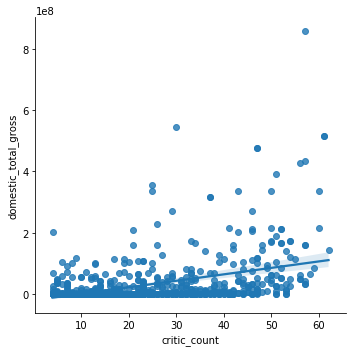

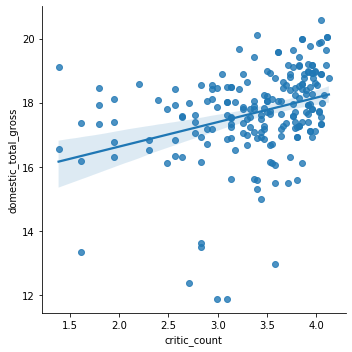

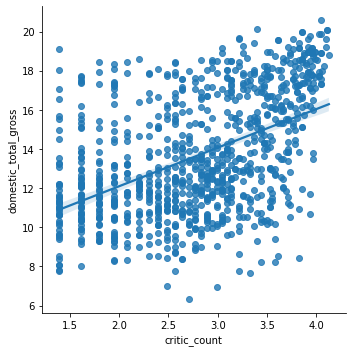

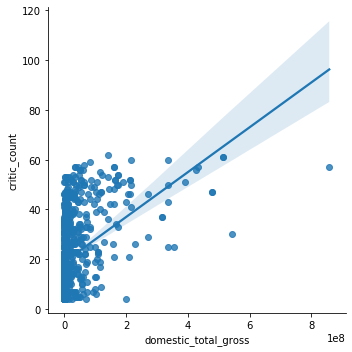

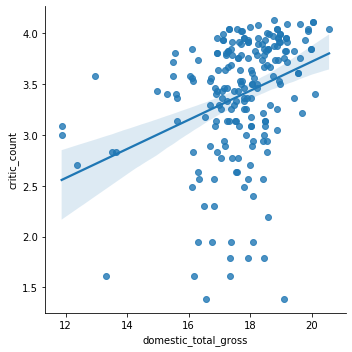

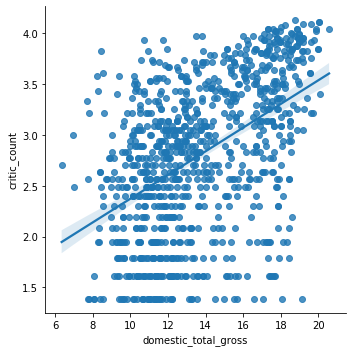

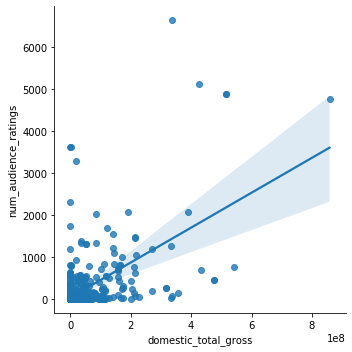

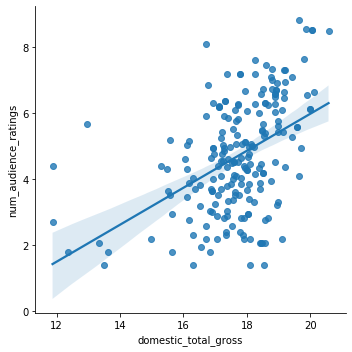

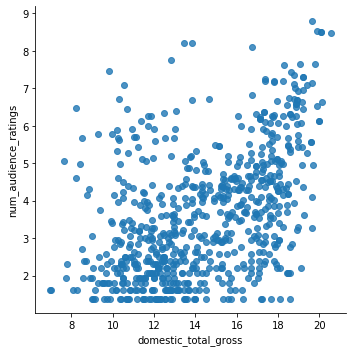

In [270]:
sns.lmplot(x="critic_count", y="domestic_total_gross", data=dropped_noscores);
sns.lmplot(x="critic_count", y="domestic_total_gross", data=log_transform_dropped);
sns.lmplot(x="critic_count", y="domestic_total_gross", data=log_transform);
sns.lmplot(x="domestic_total_gross", y="critic_count", data=dropped_noscores);
sns.lmplot(x="domestic_total_gross", y="critic_count", data=log_transform_dropped);
sns.lmplot(x="domestic_total_gross", y="critic_count", data=log_transform);
sns.lmplot(x="domestic_total_gross", y="num_audience_ratings", data=dropped_noscores);
sns.lmplot(x="domestic_total_gross", y="num_audience_ratings", data=log_transform_dropped);
sns.lmplot(x="domestic_total_gross", y="num_audience_ratings", data=log_transform);

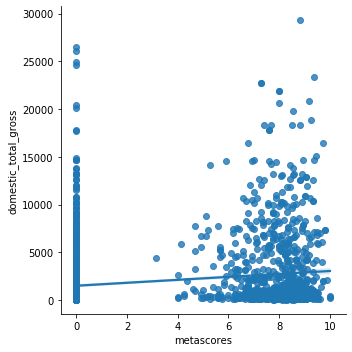

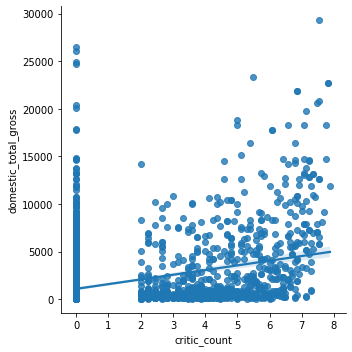

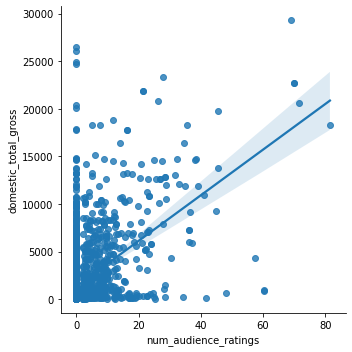

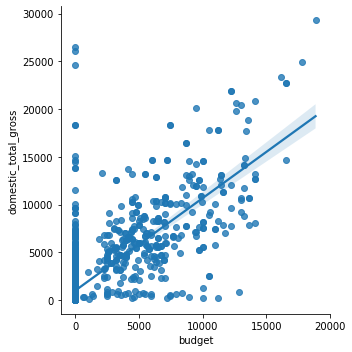

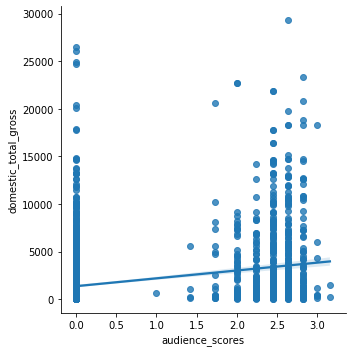

In [249]:
sns.lmplot(x="metascores", y="domestic_total_gross", data=exp_transform);
# sns.lmplot(x="domestic_total_gross", y="metascores", data=exp_transform);
# sns.lmplot(x="domestic_total_gross", y="critic_count", data=exp_transform);
sns.lmplot(x="critic_count", y="domestic_total_gross", data=exp_transform);
# sns.lmplot(x="critic_count", y="metascores", data=exp_transform);
sns.lmplot(x="num_audience_ratings", y="domestic_total_gross", data=exp_transform);
sns.lmplot(x="budget", y="domestic_total_gross", data=exp_transform);
sns.lmplot(x="audience_scores", y="domestic_total_gross", data=exp_transform);


In [258]:
X, y = exp_transform.drop(['domestic_total_gross'], axis=1), exp_transform['domestic_total_gross']

# splitting X, y into datasets X)train, y_train (60% of original) and X_val, y_val (20% of original)
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1337)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=21)

# model 1 -- simple linear regression
lm = LinearRegression()
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

# model 2 - polynomial features
lm_poly = LinearRegression()

# validate
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val): .3f}')

lm_poly.fit(X, y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test): .3f}')

Linear Regression val R^2: 0.676
Degree 2 polynomial regression val R^2:  0.699
Linear Regression test R^2:  0.610


In [268]:
X, y = log_transform_dropped.drop(['domestic_total_gross'], axis=1), log_transform_dropped['domestic_total_gross']

# splitting X, y into datasets X)train, y_train (60% of original) and X_val, y_val (20% of original)
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1337)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=21)

# model 1 -- simple linear regression
lm = LinearRegression()
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

# model 2 - polynomial features
lm_poly = LinearRegression()

# validate
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val): .3f}')

lm_poly.fit(X, y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test): .3f}')

Linear Regression val R^2: 0.373
Degree 2 polynomial regression val R^2:  0.329
Linear Regression test R^2:  0.351


In [117]:
X, y = m_df.drop(['domestic_total_gross'], axis=1), m_df['domestic_total_gross']

# splitting X, y into datasets X)train, y_train (60% of original) and X_val, y_val (20% of original)
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1337)

In [118]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=420)

In [119]:
# model 1 -- simple linear regression
lm = LinearRegression()
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

# model 2 - polynomial features
lm_poly = LinearRegression()

In [120]:
# validate
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val): .3f}')

Linear Regression val R^2: 0.609
Degree 2 polynomial regression val R^2:  0.661


The degree 2 polynomial regression actually looks pretty good, based on these results. So we'll try that one on all the training/validation data.

In [121]:
lm_poly.fit(X, y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test): .3f}')

Linear Regression test R^2:  0.649


In [201]:
X, y = m_df.drop('domestic_total_gross', axis=1), m_df['domestic_total_gross']
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
X, y = np.array(X), np.array(y)

In [207]:
variable = 0
while variable < 50:
    kf = KFold(n_splits=5, shuffle=True, random_state=variable)
    cv_lm_r2s, cv_lm_scale_r2s, = [], []

    for train_ind, val_ind in kf.split(X, y):

        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]

        lm = LinearRegression()
        lm.fit(X_train, y_train)
        cv_lm_r2s.append(lm.score(X_val, y_val))

        print('Simple regression scores: ', cv_lm_r2s)
        print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s): .3f} += {np.std(cv_lm_r2s): .3f}')
        variable += 1

Simple regression scores:  [0.5966755578432607]
Simple mean cv r^2:  0.597 +=  0.000
Simple regression scores:  [0.5966755578432607, 0.2891844108152849]
Simple mean cv r^2:  0.443 +=  0.154
Simple regression scores:  [0.5966755578432607, 0.2891844108152849, 0.44832949635345265]
Simple mean cv r^2:  0.445 +=  0.126
Simple regression scores:  [0.5966755578432607, 0.2891844108152849, 0.44832949635345265, 0.7017374758251989]
Simple mean cv r^2:  0.509 +=  0.156
Simple regression scores:  [0.5966755578432607, 0.2891844108152849, 0.44832949635345265, 0.7017374758251989, 0.42076784542053314]
Simple mean cv r^2:  0.491 +=  0.144
Simple regression scores:  [0.34628926502654833]
Simple mean cv r^2:  0.346 +=  0.000
Simple regression scores:  [0.34628926502654833, 0.776981935226846]
Simple mean cv r^2:  0.562 +=  0.215
Simple regression scores:  [0.34628926502654833, 0.776981935226846, 0.33712224946408875]
Simple mean cv r^2:  0.487 +=  0.205
Simple regression scores:  [0.34628926502654833, 0.776

In [203]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y,
               cv=5,
               scoring='r2')

array([0.78923858, 0.47964234, 0.57236587, 0.68635175, 0.18379102])

0.491338957251546
0.5256243562792862
0.5638416661716491
0.5486153295203231
0.505942160246397
0.5011776288850606
0.5495431088805511
0.5356755131260366
0.5693378031195073
0.5417336915045441
0.5145652752082146
0.5714020919381717
0.5350149480030751
0.5484875850574805
0.5243318464986435
0.5227085308190151
0.4950443698951875
0.5329161386109286
0.5463817665251929
0.5407889860891895
0.48001396887648673
0.47451290464961426
0.5410560373469527
0.5329117039501835
0.5742109361012815
0.5052278825161849
0.5328913283607808
0.5240512228709605
0.566415275224567
0.5388446917492327
0.5234768987924712
0.5511635220831425
0.49412214540492877
0.545831878453012
0.5280255269784443
0.4903277453482067
0.5301085818504773
0.5458813933144663
0.48418003201801285
0.5264574216702312
0.5441240299415588
0.5310758504652409
0.5551186317882285
0.5324222445196719
0.5295730388093888
0.47592795912846036
0.5622193360659058
0.555224396211105
0.48498301781723996
0.5357728289583429
0.4989845885687931
0.5788634549648031
0.512234110